# EDA Notebook Test

This notebook seems to only work on the Colab Pro instance with High Memory

I believe this is because the CSV file is 2.6GB and it generateds a very large 5-6GB pandas dataframe.

If restricting the columns loaded it will probably work on Colab Free. Colab Pro is $9.99 per month so I just bought a month of credits.

I am using this for practicew before starting using SageMaker because

a) It costs more in AWS credits
b) I had to use a much larger instance type in SageMaker to make it work

In [1]:
import boto3
import pandas as pd
import os

# Define local file path
local_file_path = "merged_data_local.csv"  # Change as needed

# Define S3 details
bucket_name = "sagemaker-us-west-2-986030204467"
file_key = "capstone/testfiles/PISA_2022_Background_questionnaire_edited.csv"

# AWS credentials are usually stored in ~/.aws/credentials or IAM roles (if running on AWS services)
s3_client = boto3.client("s3")

# Read the file from S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

columns_to_read = [
    "MATH_Proficient", "CNT", "CNTRYID", "CNTSCHID", "CNTSTUID", "SISCO", "ST347Q01JA", "ST347Q02JA",
    "ST349Q01JA", "ST350Q01JA", "ST356Q01JA", "ST322Q01JA", "ST322Q02JA", "ST322Q03JA", "ST322Q04JA",
    "ST322Q06JA", "ST322Q07JA", "DURECEC", "EFFORT1", "EFFORT2", "ST259Q01JA", "WB164Q01HA", "HOMEPOS",
    "ST004D01T", "GRADE", "REPEAT", "EXPECEDU", "ICTAVSCH", "ICTAVHOM", "ICTDISTR", "IMMIG", "LANGN",
    "TARDYSD", "ST226Q01JA", "ST016Q01NA", "MISSSC", "Option_UH", "OECD", "PAREDINT", "BMMJ1", "BFMJ2",
    "WB163Q06HA", "WB163Q07HA", "ST230Q01JA", "SKIPPING", "IC180Q01JA", "IC180Q08JA", "ST059Q02JA",
    "ST296Q04JA", "WB176Q01HA", "STUDYHMW", "IC184Q01JA", "IC184Q02JA", "IC184Q03JA", "IC184Q04JA",
    "ST059Q01TA", "ST296Q01JA", "ST272Q01JA", "ST268Q01JA", "ST268Q04JA", "ST268Q07JA", "ST293Q04JA",
    "ST297Q01JA", "ST297Q03JA", "ST297Q05JA", "ST297Q06JA", "ST297Q07JA", "ST297Q09JA", "WB165Q01HA",
    "WB166Q01HA", "WB166Q02HA", "WB166Q03HA", "WB166Q04HA", "ST258Q01JA", "ST294Q01JA", "ST295Q01JA",
    "WB150Q01HA", "WB156Q01HA", "WB158Q01HA", "WB160Q01HA", "WB161Q01HA", "WB171Q01HA", "WB171Q02HA",
    "WB171Q03HA", "WB171Q04HA", "WB172Q01HA", "WB173Q01HA", "WB173Q02HA", "WB173Q03HA", "WB173Q04HA",
    "WB177Q01HA", "WB177Q02HA", "WB177Q03HA", "WB177Q04HA", "WB032Q01NA", "WB032Q02NA", "WB031Q01NA",
    "EXERPRAC", "STUBMI", "RELATST", "BELONG", "BULLIED", "FEELSAFE", "SCHRISK", "PERSEVAGR", "CURIOAGR",
    "COOPAGR", "EMPATAGR", "ASSERAGR", "STRESAGR", "EMOCOAGR", "GROSAGR", "INFOSEEK", "FAMSUP", "DISCLIM",
    "TEACHSUP", "COGACRCO", "COGACMCO", "EXPOFA", "EXPO21ST", "MATHEFF", "MATHEF21", "FAMCON", "ANXMAT",
    "MATHPERS", "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP", "OPENART", "IMAGINE",
    "SCHSUST", "LEARRES", "PROBSELF", "FAMSUPSL", "FEELLAH", "SDLEFF", "ICTRES", "ESCS", "FLSCHOOL",
    "FLMULTSB", "FLFAMILY", "ACCESSFP", "FLCONFIN", "FLCONICT", "ACCESSFA", "ATTCONFM", "FRINFLFM",
    "ICTSCH", "ICTHOME", "ICTQUAL", "ICTSUBJ", "ICTENQ", "ICTFEED", "ICTOUT", "ICTWKDY", "ICTWKEND",
    "ICTREG", "ICTINFO", "ICTEFFIC", "BODYIMA", "SOCONPA", "LIFESAT", "PSYCHSYM", "SOCCON", "EXPWB",
    "CURSUPP", "PQMIMP", "PQMCAR", "PARINVOL", "PQSCHOOL", "PASCHPOL", "ATTIMMP", "CREATHME", "CREATACT",
    "CREATOPN", "CREATOR", "WORKPAY", "WORKHOME"
]

# Check if the file exists locally
if os.path.exists(local_file_path):
    print("📂 Loading data from local file...")
    df = pd.read_csv(local_file_path, usecols=columns_to_read)
else:
    print("☁️ Downloading data from S3...")
    
    # Create S3 client
    s3_client = boto3.client("s3")

    # Download the file from S3
    response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

    # Read the file into pandas DataFrame
    df = pd.read_csv(response["Body"], usecols=columns_to_read)

    # Save a local copy for future use
    df.to_csv(local_file_path, index=False)
    print(f"✅ File saved locally as {local_file_path}")

# Display first few rows
df.head()

📂 Loading data from local file...


/tmp/ipykernel_489/3023355713.py:47: DtypeWarning: Columns (7,8,9,10,11,12,19,20,21,22,23,24,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,160) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_file_path, usecols=columns_to_read)


,CNT,CNTRYID,CNTSCHID,CNTSTUID,OECD,Option_UH,ST004D01T,ST230Q01JA,ST258Q01JA,ST259Q01JA,...,PQMCAR,PARINVOL,PQSCHOOL,PASCHPOL,ATTIMMP,CREATHME,CREATACT,CREATOPN,CREATOR,MATH_Proficient
0,ALB,8,800282,800001,0,0,1,4,1,10,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,0
1,ALB,8,800115,800002,0,0,2,3,1,7,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,0
2,ALB,8,800242,800003,0,0,2,4,1,8,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,0
3,ALB,8,800245,800005,0,0,1,3,1,5,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,0
4,ALB,8,800285,800006,0,0,1,2,1,8,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,1


These files

 - PISA_2022_Background_questionnaire_edited.csv
    - This is Selenes main data file with the MATH_Proficient variable
 - PISA 2022 - CSV - DD - Sheet1.csv
    - This is a data dictionary of the fields

are in our team drive here, you can COPY them to your own drive and then replace the location below with your own Google drive location.

https://drive.google.com/drive/u/0/folders/1hIvOM9aUiH7Qt4ry4epsStLCGwbSHv7C

In [2]:
# Load the metadata file
file_key = "capstone/testfiles/PISA 2022 - CSV - DD - Sheet1.csv"  # e.g., "datasets/mydata.csv"

# Read the file from S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

df_metadata = pd.read_csv(response["Body"], usecols=[0, 4], names=["Field_ID", "Field_Description"], header=0)

# Display first few rows to verify
print(df_metadata.head())

# Convert to dictionary for quick lookup
field_description_lookup = df_metadata.set_index("Field_ID")["Field_Description"].to_dict()

   Field_ID                                  Field_Description
0       CNT                           Country code 3-character
1   CNTRYID                                 Country Identifier
2  CNTSCHID                                    Intl. School ID
3  CNTSTUID                                   Intl. Student ID
4       CYC  PISA Assessment Cycle (2 digits + 2 character ...


In [3]:
# Display the first few rows to get a feel for the data
print("Data preview:")
print(df.head())

# Check the dimensions of the DataFrame (rows, columns)
print("\nShape of the DataFrame:")
print(df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame info:")
print(df.info())

Data preview:
   CNT  CNTRYID  CNTSCHID  CNTSTUID  OECD  Option_UH  ST004D01T ST230Q01JA  \
0  ALB        8    800282    800001     0          0          1          4   
1  ALB        8    800115    800002     0          0          2          3   
2  ALB        8    800242    800003     0          0          2          4   
3  ALB        8    800245    800005     0          0          1          3   
4  ALB        8    800285    800006     0          0          1          2   

  ST258Q01JA ST259Q01JA  ... PQMCAR PARINVOL PQSCHOOL PASCHPOL ATTIMMP  \
0          1         10  ...   99.0     99.0     99.0     99.0    99.0   
1          1          7  ...   99.0     99.0     99.0     99.0    99.0   
2          1          8  ...   99.0     99.0     99.0     99.0    99.0   
3          1          5  ...   99.0     99.0     99.0     99.0    99.0   
4          1          8  ...   99.0     99.0     99.0     99.0    99.0   

  CREATHME CREATACT CREATOPN CREATOR MATH_Proficient  
0     99.0     99

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define invalid response values
invalid_values = [95, 97, 98, 99]

# Create a separate DataFrame for analysis without modifying df
df_analysis = df.copy()

# Define prefixes to include (e.g., "SQ", "ST", "XX")
prefixes = ["ST", "IC","WB"]  # <-- Add any prefixes you need

# Define prefixes to EXCLUDE (e.g., "EX", "UNWANTED")
# Here I exclude a bunch of WLE variables and almost all country specific questions (or questiosn which mention country specific as a thing)
exclude_prefixes = ["ICT", "ST250D06JA", "ST250D07JA","ST251D06JA","ST251D07JA","ST251D08JA","ST251D09JA","ST294Q05JA","ST295Q05JA","WB032Q02NA","WB032Q01NA","ST330D10WA","ST295Q05JA","ST294Q05JA"]  # Exclude the weight average ICT ones for now


# Define specific columns to include, even if they don't match a prefix
specific_columns = ["MATH_Proficient", "ICTRES"]  # <-- Add column names you want

# Filter columns: Include if they match an include prefix OR are in specific_columns
selected_columns = [
    col for col in df.columns
    if (col in specific_columns or any(col.startswith(p) for p in prefixes))
]

# Apply exclusion only to columns that are NOT in `specific_columns`
selected_columns = [
    col for col in selected_columns
    if col in specific_columns or not any(col.startswith(p) for p in exclude_prefixes)
]

# Ensure selected columns exist in DataFrame (to avoid errors)
selected_columns = [col for col in selected_columns if col in df_analysis.columns]

# Keep only selected columns in the analysis DataFrame
#df_analysis = df_analysis[selected_columns]

# Display selected columns for verification
print("Selected Columns for Analysis:", df_analysis.columns)

# Convert categorical integer responses to NaN if they are invalid
def clean_survey_responses(df, invalid_values):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].apply(lambda x: np.nan if x in invalid_values else x)
    return df

df_analysis = clean_survey_responses(df_analysis, invalid_values)



Selected Columns for Analysis: Index(['CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'OECD', 'Option_UH',
       'ST004D01T', 'ST230Q01JA', 'ST258Q01JA', 'ST259Q01JA',
       ...
       'PQMCAR', 'PARINVOL', 'PQSCHOOL', 'PASCHPOL', 'ATTIMMP', 'CREATHME',
       'CREATACT', 'CREATOPN', 'CREATOR', 'MATH_Proficient'],
      dtype='object', length=181)


In [5]:
# Display the first few rows to get a feel for the data
print("Data preview:")
print(df_analysis.head())

# Check the dimensions of the DataFrame (rows, columns)
print("\nShape of the DataFrame:")
print(df_analysis.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame info:")
print(df_analysis.info())

# Check basic statistics
print("Basic Statistics:")
print(df_analysis.describe())


Data preview:
   CNT  CNTRYID  CNTSCHID  CNTSTUID  OECD  Option_UH  ST004D01T ST230Q01JA  \
0  ALB        8    800282    800001     0          0          1          4   
1  ALB        8    800115    800002     0          0          2          3   
2  ALB        8    800242    800003     0          0          2          4   
3  ALB        8    800245    800005     0          0          1          3   
4  ALB        8    800285    800006     0          0          1          2   

  ST258Q01JA ST259Q01JA  ... PQMCAR PARINVOL PQSCHOOL PASCHPOL ATTIMMP  \
0          1         10  ...    NaN      NaN      NaN      NaN     NaN   
1          1          7  ...    NaN      NaN      NaN      NaN     NaN   
2          1          8  ...    NaN      NaN      NaN      NaN     NaN   
3          1          5  ...    NaN      NaN      NaN      NaN     NaN   
4          1          8  ...    NaN      NaN      NaN      NaN     NaN   

  CREATHME CREATACT CREATOPN CREATOR MATH_Proficient  
0      NaN      N

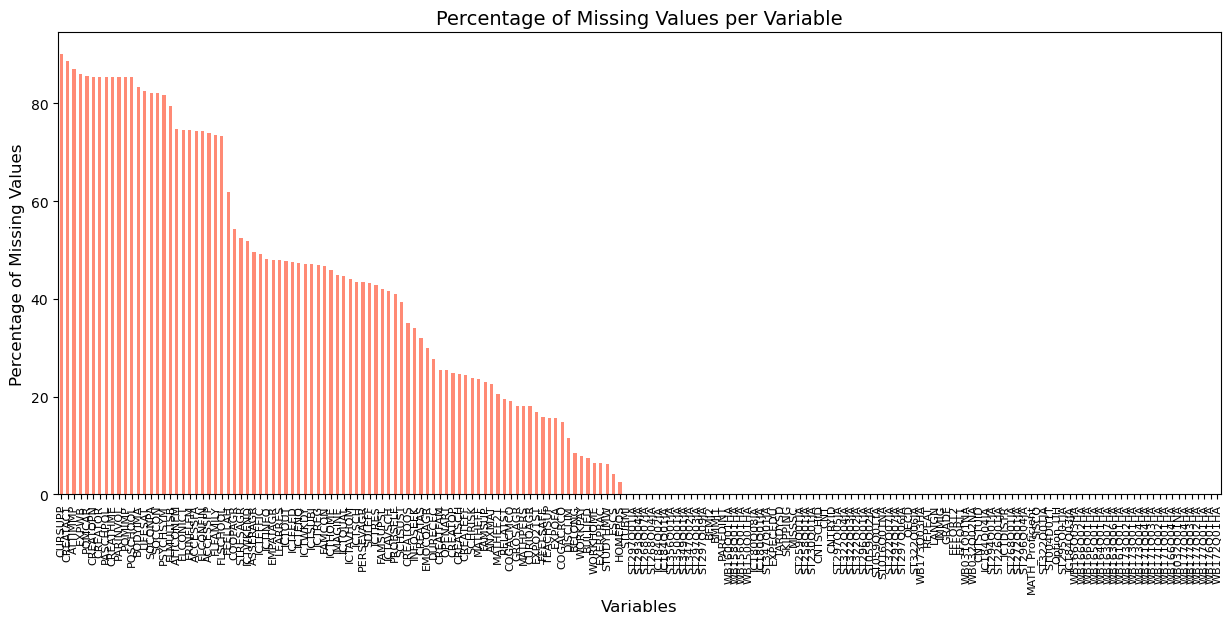

In [6]:
import matplotlib.pyplot as plt

# Calculate percentage of missing values
null_percentages = df_analysis.isnull().mean() * 100

# Sort by highest missing values
null_percentages = null_percentages.sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(15, 6))
null_percentages.plot(kind='bar', color='tomato', alpha=0.75)

# Formatting
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Percentage of Missing Values", fontsize=12)
plt.title("Percentage of Missing Values per Variable", fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate labels for readability

plt.show()

In [7]:
# Exclude 'CNT' column from the missing values calculation
missing_by_country = df_analysis.groupby("CNT").apply(lambda x: x.drop(columns=["CNT"]).isnull().mean() * 100)

# No need to droplevel since CNT is no longer included in the index
missing_by_country = missing_by_country.T  # Transpose for readability

# Save to CSV
csv_filename = "missing_values_by_country.csv"
missing_by_country.to_csv(csv_filename, index=True)

print(f"✅ Missing values breakdown saved to {csv_filename}")


✅ Missing values breakdown saved to missing_values_by_country.csv


/tmp/ipykernel_489/3045937898.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = df_analysis.groupby("CNT").apply(lambda x: x.drop(columns=["CNT"]).isnull().mean() * 100)


/tmp/ipykernel_489/227924328.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = df_analysis.groupby("CNT").apply(lambda x: x.drop(columns=["CNT"]).isnull().mean() * 100)


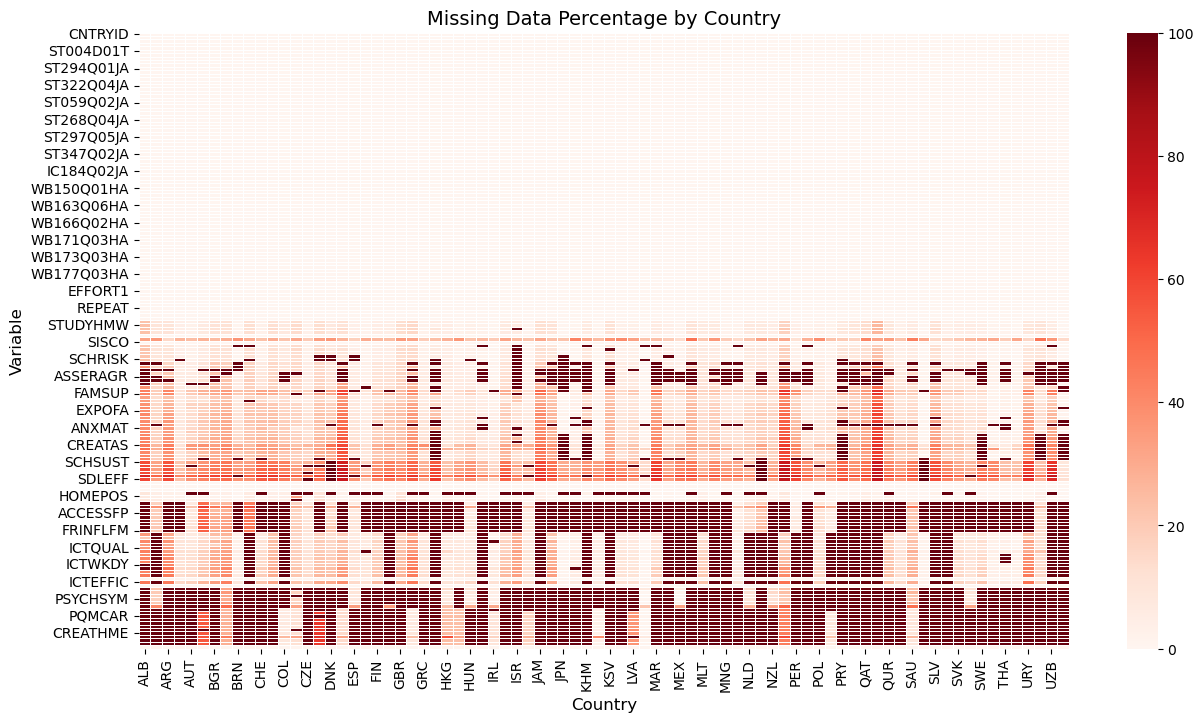

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'CNT' column from the missing values calculation
missing_by_country = df_analysis.groupby("CNT").apply(lambda x: x.drop(columns=["CNT"]).isnull().mean() * 100)

# Transpose for readability (countries as columns, variables as rows)
missing_by_country = missing_by_country.T  

# Ensure values are numeric
missing_by_country = missing_by_country.astype(float)

# Plot heatmap WITHOUT numbers (only color)
plt.figure(figsize=(15, 8))
sns.heatmap(missing_by_country, cmap="Reds", annot=False, linewidths=0.5, cbar=True, vmin=0, vmax=100)

# Formatting
plt.title("Missing Data Percentage by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Variable", fontsize=12)

# Show plot
plt.show()


<Figure size 1500x600 with 0 Axes>

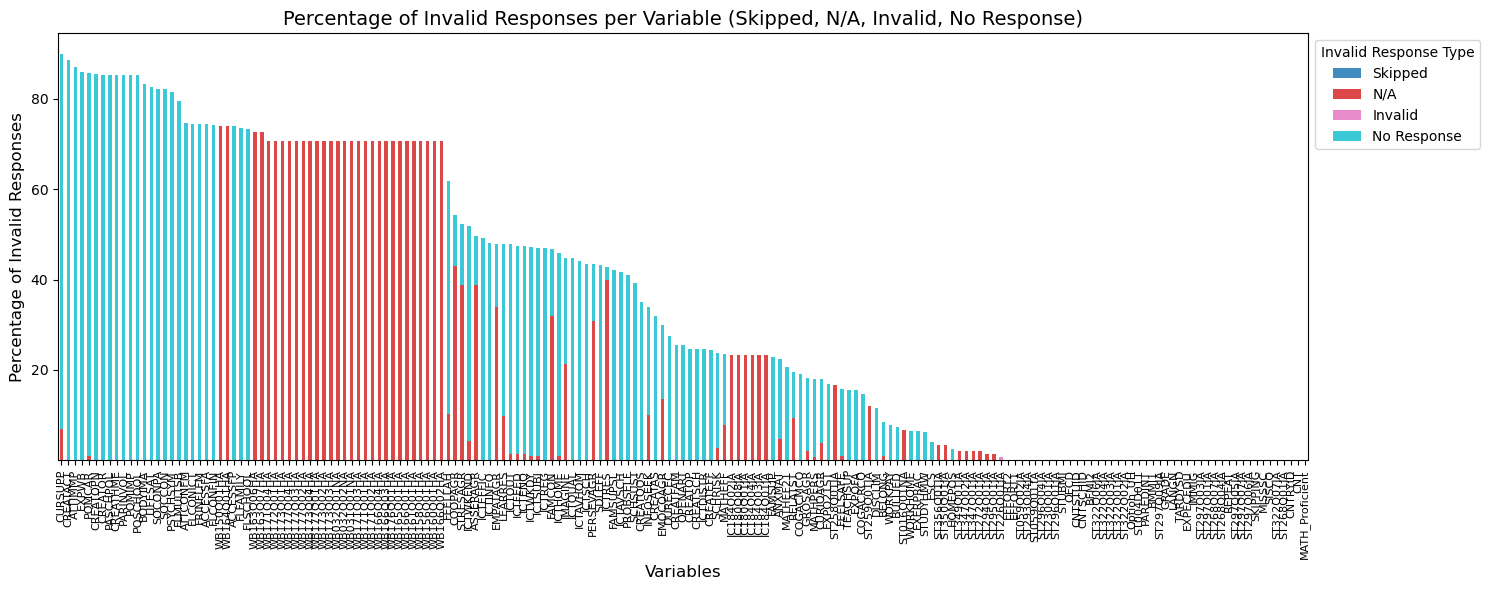

In [8]:
import matplotlib.pyplot as plt

# Define invalid values with their descriptions
invalid_values = {95: "Skipped", 97: "N/A", 98: "Invalid", 99: "No Response"}

# Calculate the percentage of each invalid value per column
invalid_counts = {desc: (df == val).mean() * 100 for val, desc in invalid_values.items()}

# Convert to DataFrame for plotting
invalid_df = pd.DataFrame(invalid_counts)

# Sort by total invalid percentage (descending)
invalid_df["Total Invalid %"] = invalid_df.sum(axis=1)
invalid_df = invalid_df.sort_values(by="Total Invalid %", ascending=False)

# Plot stacked bar chart
plt.figure(figsize=(15, 6))
invalid_df.drop(columns=["Total Invalid %"]).plot(kind='bar', stacked=True, figsize=(15, 6), colormap="tab10", alpha=0.85)

# Formatting
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Percentage of Invalid Responses", fontsize=12)
plt.title("Percentage of Invalid Responses per Variable (Skipped, N/A, Invalid, No Response)", fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate labels for readability
plt.legend(title="Invalid Response Type", bbox_to_anchor=(1, 1), loc="upper left")  # Move legend outside

plt.tight_layout()
plt.show()


In [9]:

# Check for missing values
print("\nMissing Values:")
print(df_analysis.isnull().sum())

# Select only numeric columns for correlation analysis
numeric_cols = df_analysis.select_dtypes(include=['number']).columns



Missing Values:
CNT                     0
CNTRYID                 0
CNTSCHID                0
CNTSTUID                0
OECD                    0
                    ...  
CREATHME           523865
CREATACT           543762
CREATOPN           524256
CREATOR            524006
MATH_Proficient         0
Length: 181, dtype: int64


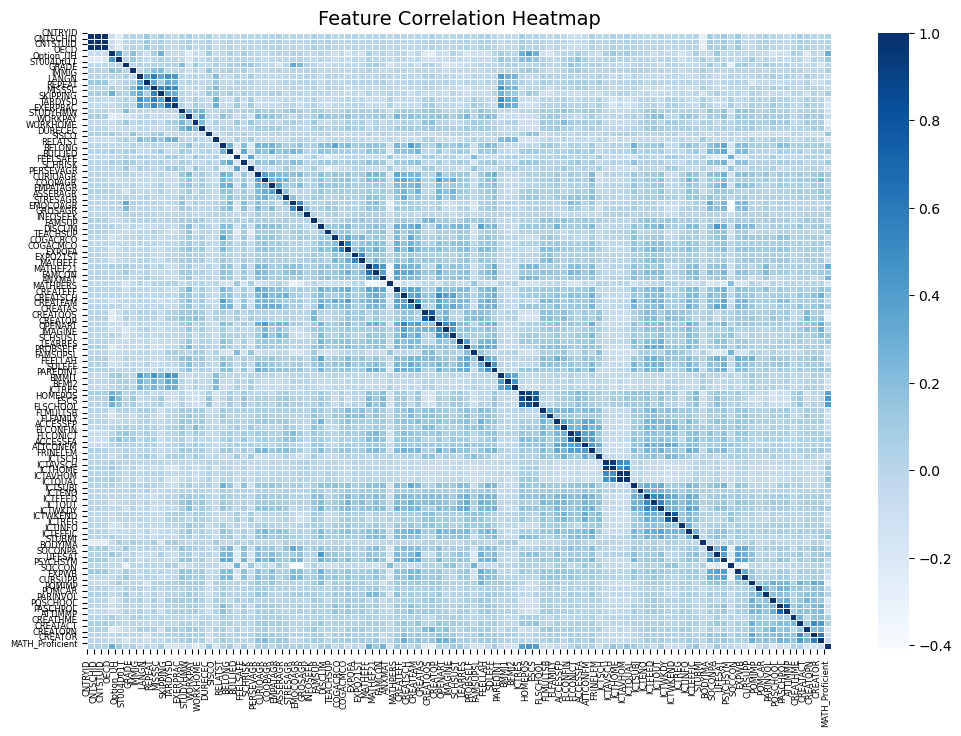

In [10]:
# Plot correlation heatmap only for numeric variables
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    df_analysis[numeric_cols].corr(),
    cmap='Blues',
    annot=False,
    linewidths=0.5
)

# Adjust font sizes and rotation for readability
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(fontsize=8, rotation=90)  # Rotate x-axis labels
plt.yticks(fontsize=8, rotation=0)   # Rotate y-axis labels

# Force every label to be shown
plt.gca().set_xticks(range(len(numeric_cols)))  # Set x-ticks
plt.gca().set_xticklabels(numeric_cols, fontsize=6, rotation=90)  # Force labels
plt.gca().set_yticks(range(len(numeric_cols)))  # Set y-ticks
plt.gca().set_yticklabels(numeric_cols, fontsize=6, rotation=0)  # Force labels

plt.show()


Top Negative Correlations with MATH_Proficient:
Creative Activities outside of school (WLE)                    -0.304112
Current Parental/guardian Support (WLE)                        -0.244007
Working for pay before or after school                         -0.238678
Creative Activities at school (WLE)                            -0.233179
Parental Involvement (WLE)                                     -0.212553
Clear idea about future job                                    -0.192500
Arriving late for school stricter definition                   -0.174493
Mathematics Anxiety (WLE)                                      -0.173397
Family support for self-directed learning (WLE)                -0.159628
Participation in creative activities outside of school (WLE)   -0.158474
Name: MATH_Proficient, dtype: float64


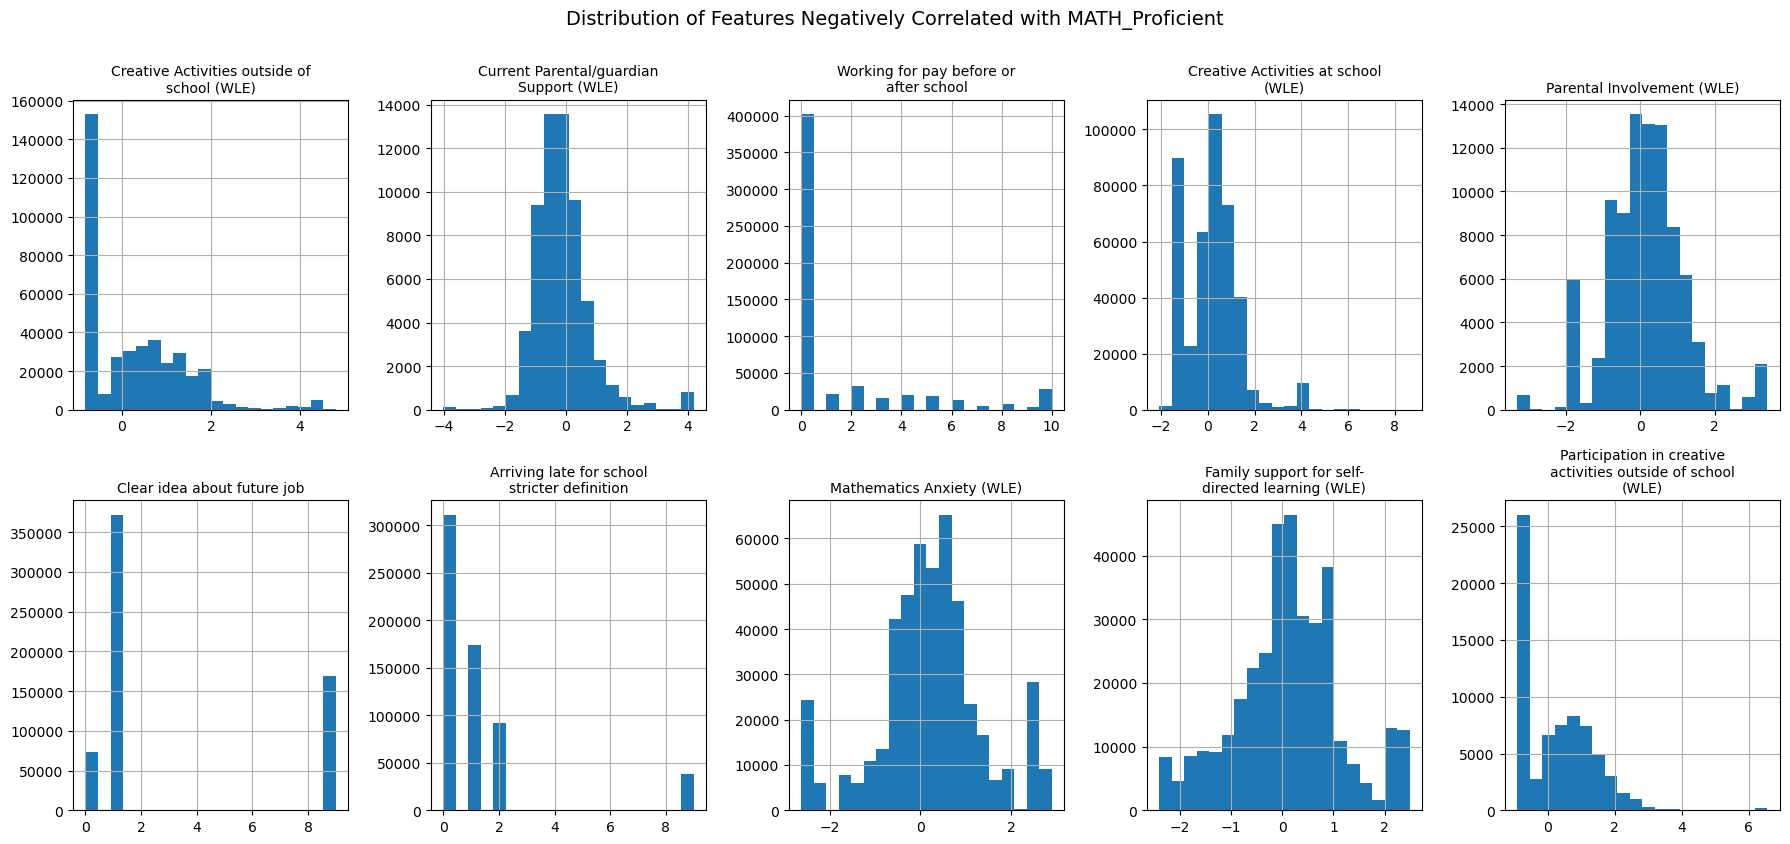

In [11]:
import textwrap

# Analyze correlation with MATH_Proficient
correlations = df_analysis[numeric_cols].corr()["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Negative Correlations with MATH_Proficient:")
print(correlations_named.head(10))

# Get top 10 negatively correlated features
top_negative = correlations.head(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_negative}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_negative):
    ax = axes[i]
    df_analysis[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Negatively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()




Top Positive Correlations with MATH_Proficient:
Availability and Usage of ICT at School                                                                0.152734
Self-efficacy in digital competencies (WLE)                                                            0.159240
Availability and Usage of ICT at Home                                                                  0.168179
Subjective familiarity with mathematics concepts (WLE)                                                 0.258798
OECD country                                                                                           0.311916
Mathematics self-efficacy: formal and applied mathematics - response options reversed in 2022 (WLE)    0.313869
ICT Resources (WLE)                                                                                    0.375823
Index of economic, social and cultural status                                                          0.407717
Home possessions (WLE)                                 

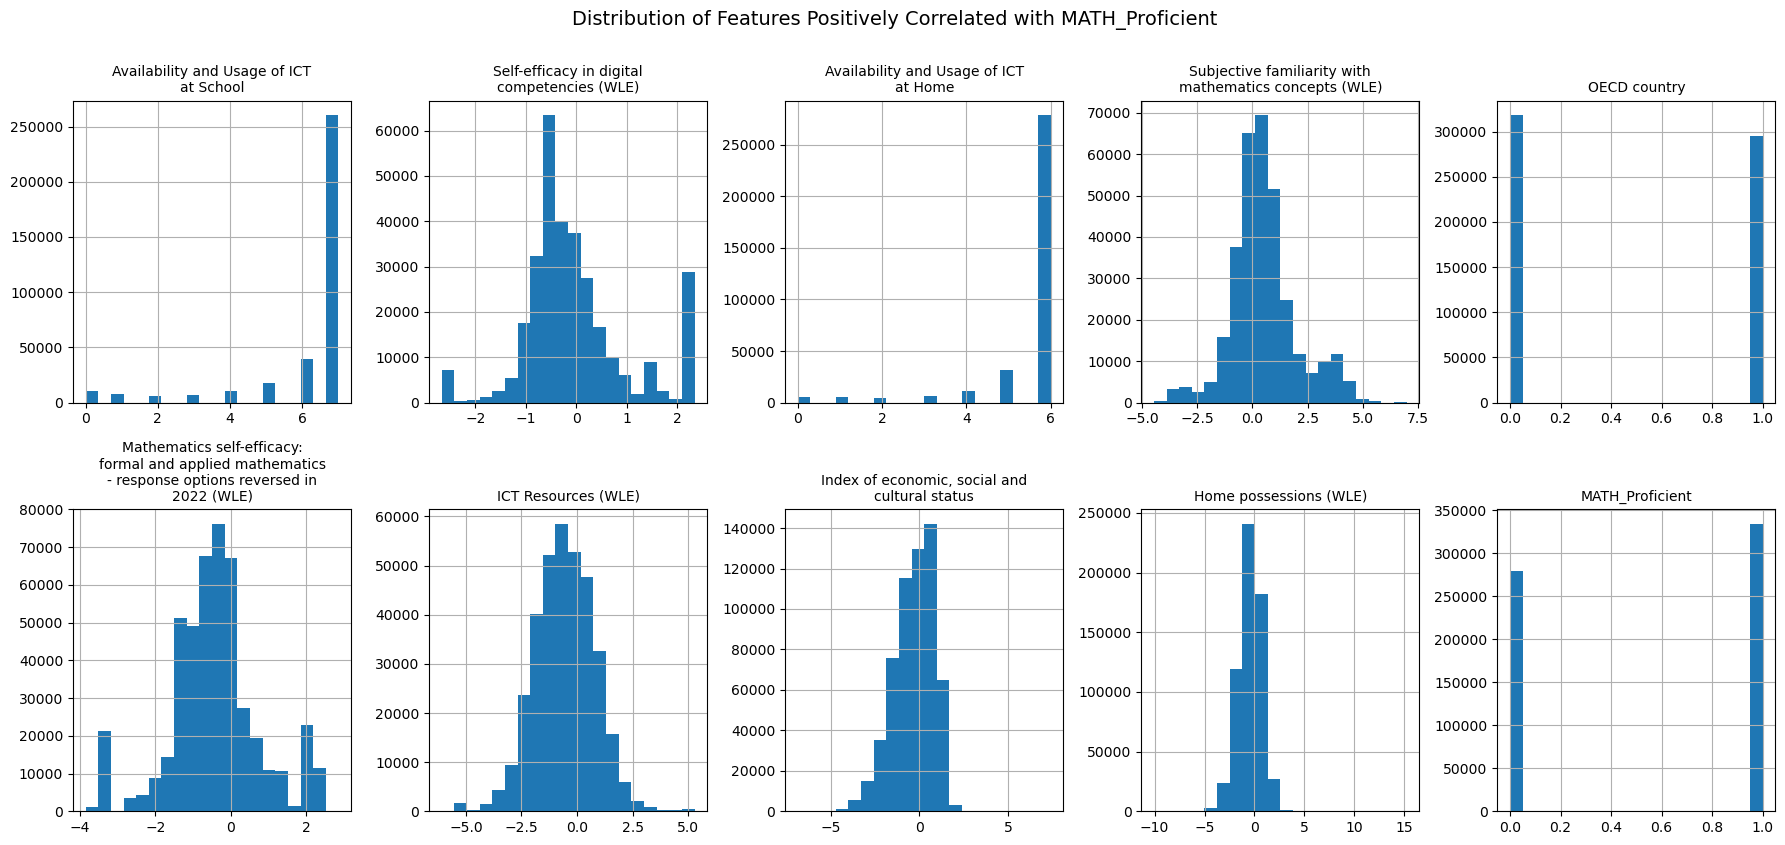

In [12]:
import textwrap

# Analyze correlation with MATH_Proficient
correlations = df_analysis[numeric_cols].corr()["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Positive Correlations with MATH_Proficient:")
print(correlations_named.tail(10))

# Get top 10 positively correlated features
top_positive = correlations.tail(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_positive}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_positive):
    ax = axes[i]
    df_analysis[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Positively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()

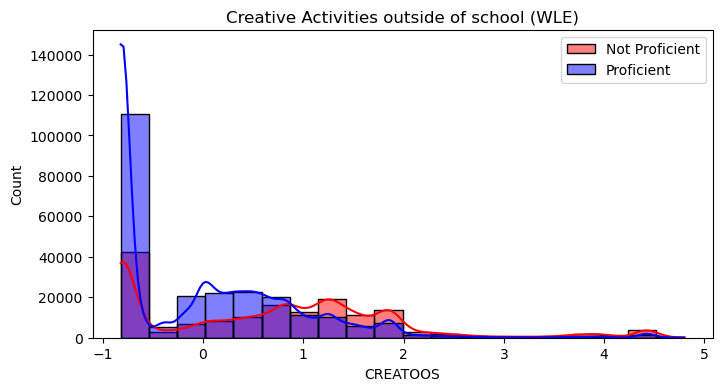

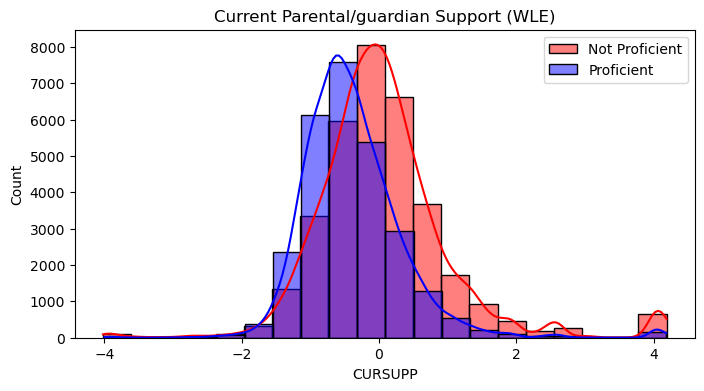

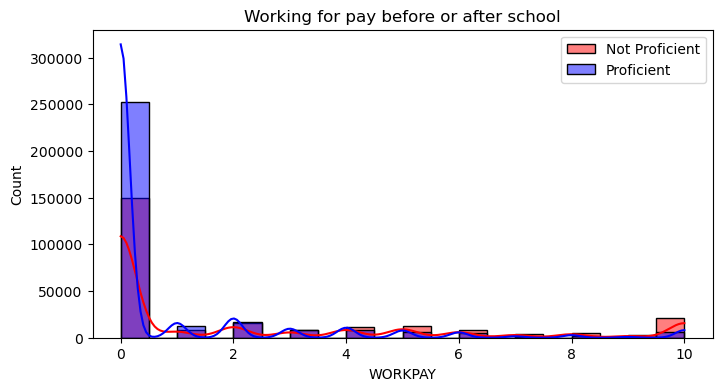

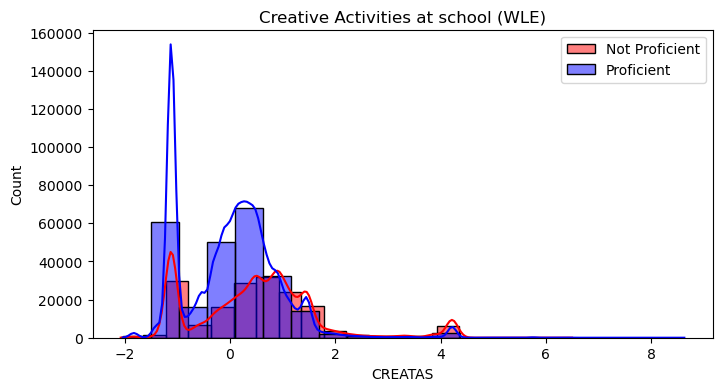

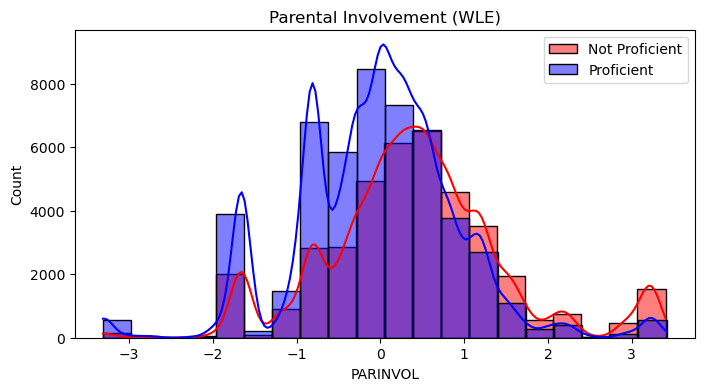

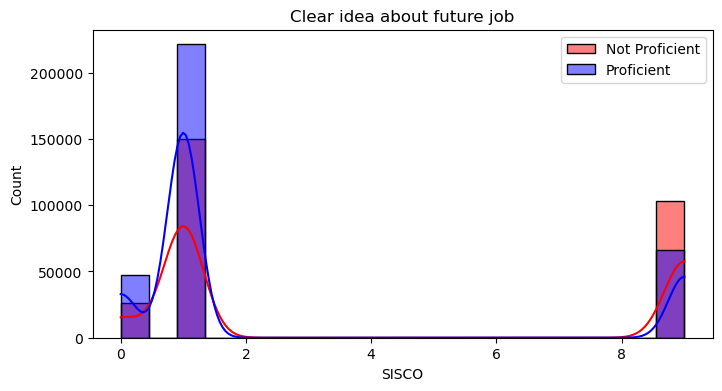

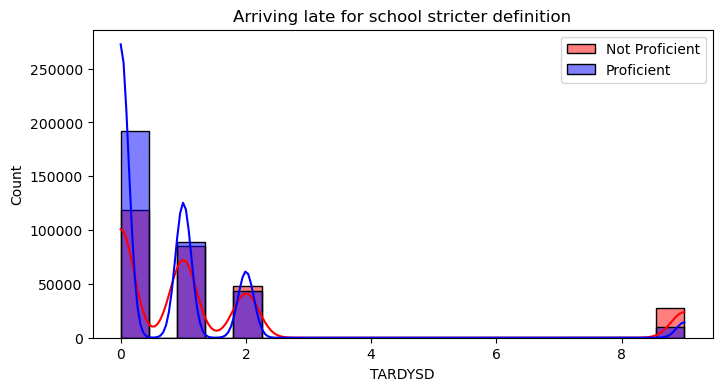

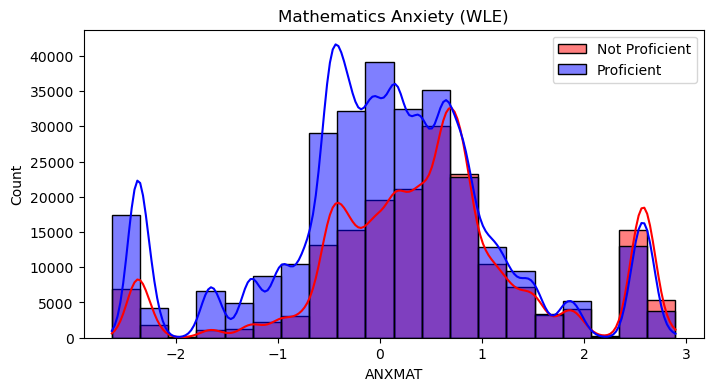

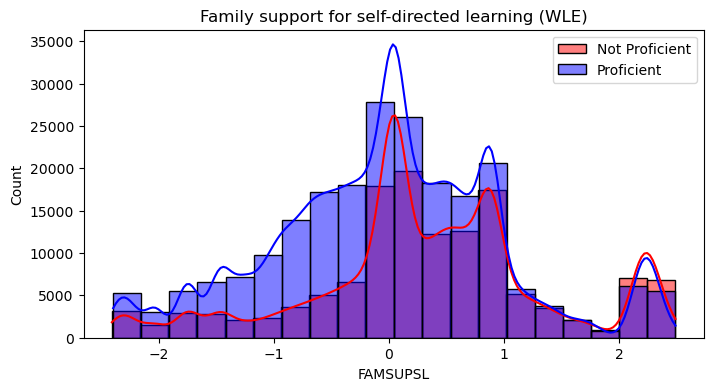

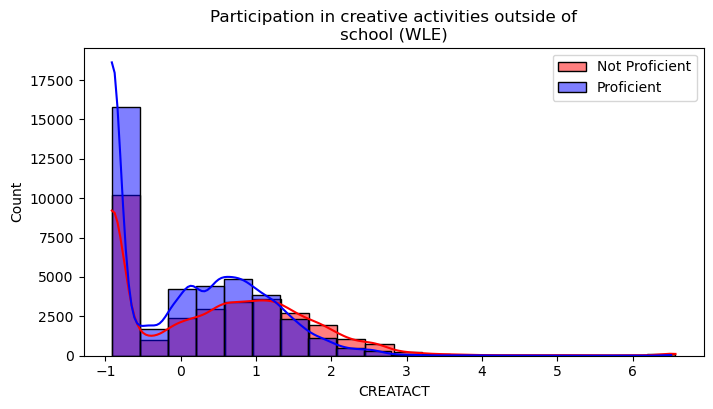

In [13]:
for col in top_negative:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_analysis[df_analysis["MATH_Proficient"] == 0][col], color="red", label="Not Proficient", kde=True, bins=20)
    sns.histplot(df_analysis[df_analysis["MATH_Proficient"] == 1][col], color="blue", label="Proficient", kde=True, bins=20)

    wrapped_title = "\n".join(textwrap.wrap(field_description_lookup.get(col, col), width=50))
    plt.title(wrapped_title)
    plt.legend()
    plt.show()

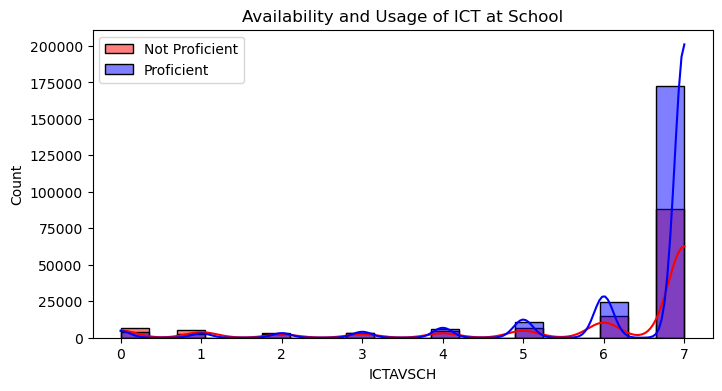

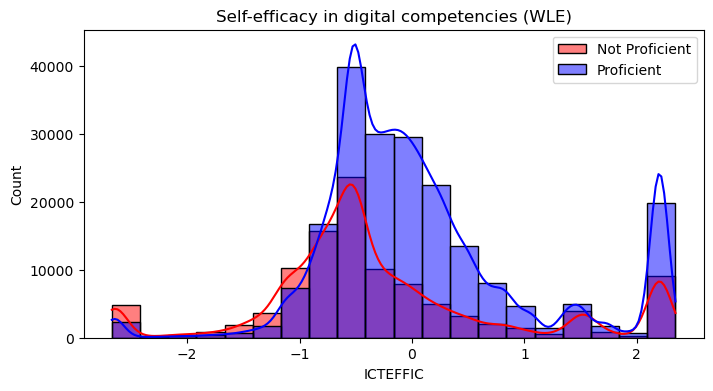

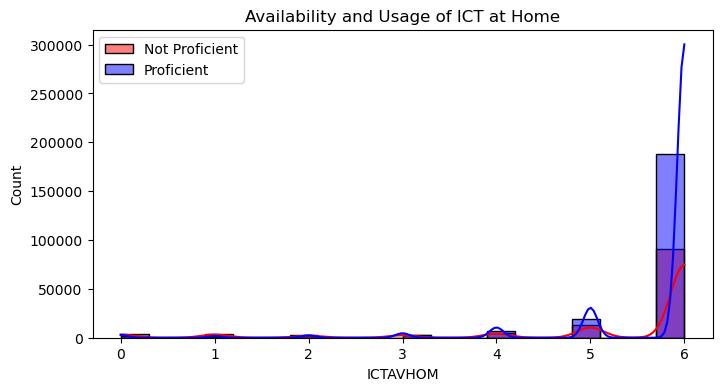

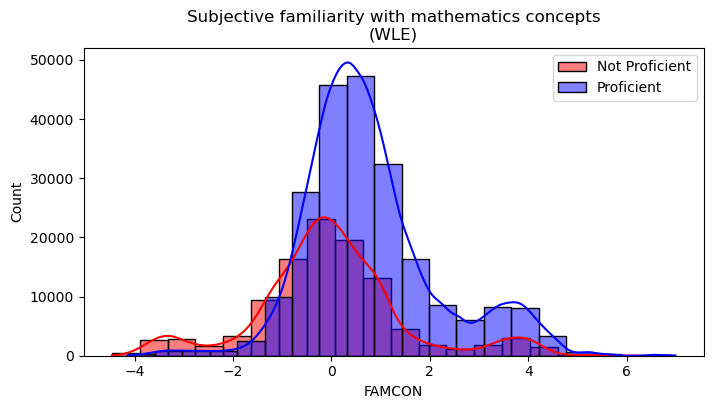

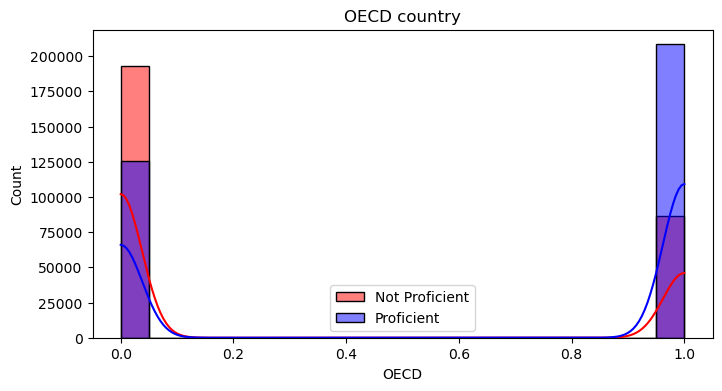

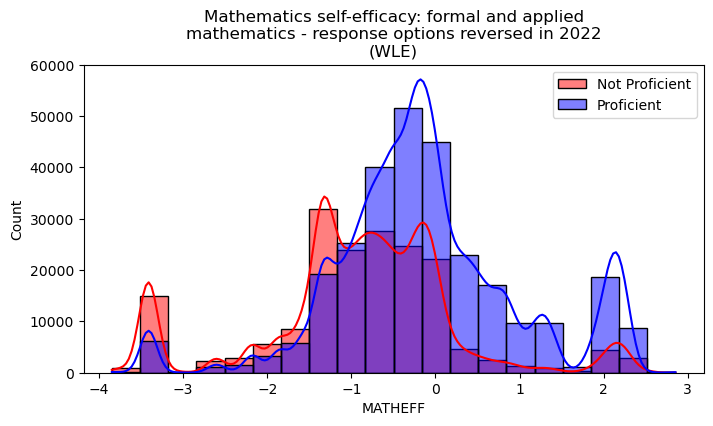

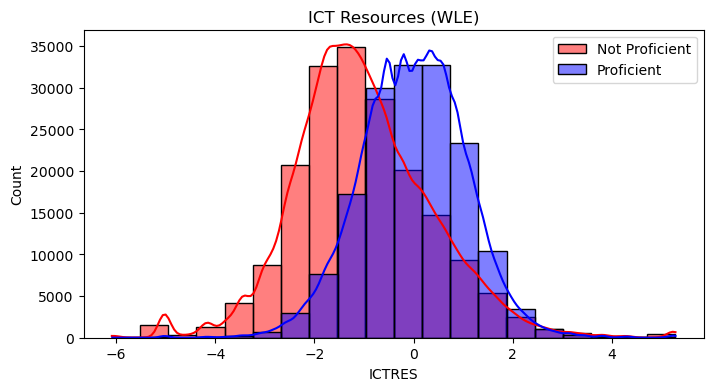

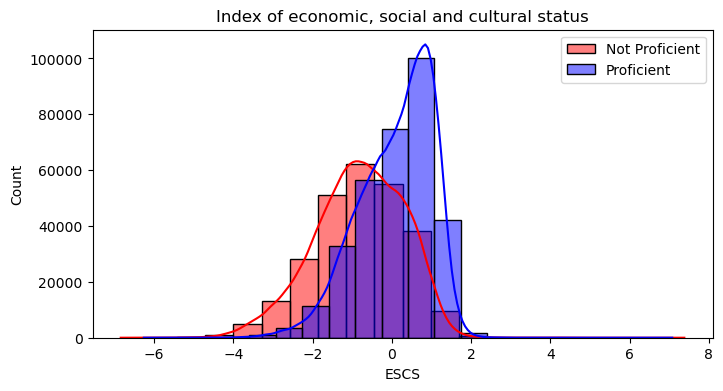

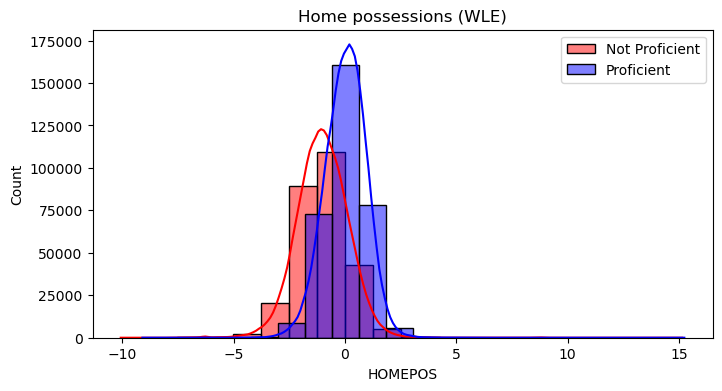

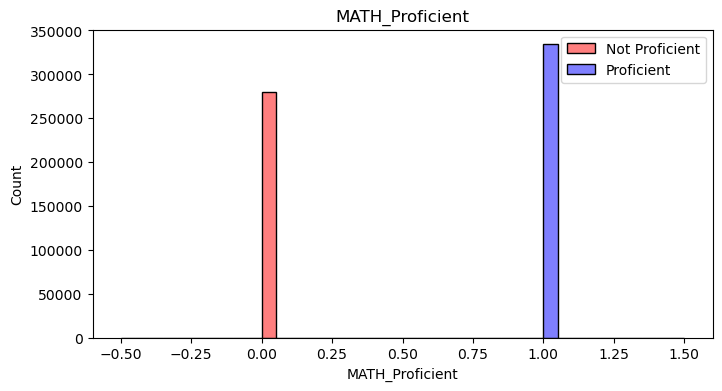

In [14]:
for col in top_positive:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_analysis[df_analysis["MATH_Proficient"] == 0][col], color="red", label="Not Proficient", kde=True, bins=20)
    sns.histplot(df_analysis[df_analysis["MATH_Proficient"] == 1][col], color="blue", label="Proficient", kde=True, bins=20)

    wrapped_title = "\n".join(textwrap.wrap(field_description_lookup.get(col, col), width=50))
    plt.title(wrapped_title)
    plt.legend()
    plt.show()